<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout6_SimpleLinearRegression_PartC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #6 - Part C : Inferential Methods for Model Parameters

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 6.1C

Consider data on the home prices of homes in La Crosse and Winona.  This data was collected using Redfin website. 
<table bgcolor="white">
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: PRICE ($) </li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>SQUAREFEET, the size of the home (ft^2)</li>
          <li>BEDS, number of bedrooms in home</li>
          <li>BATHS, number of bathrooms in home</li>
          <li>LOTSIZE, the size of the lot (ft^2)</li>
          <li>YEARBUILT, the year in which the home was built</li>
         </ul>
    </ul>
    </td>
    <td width='50%' bgclor="white">
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1KiZ5CvmWwvDg4HSPX7FwRsQTUMtvv0gG" width='50%' height='50%'></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)

Redfin Data: <a href="https://www.redfin.com/city/10404/WI/La-Crosse">La Crosse WI</a> | <a href="https://www.redfin.com/city/18151/MN/Winona">Winona MN</a></li>

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [1]:
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The **read_csv()** function is used to read in the dataset. 

In [2]:
# Reading data in using read.csv via Base 
LaCrosseWinonaHomePrices <- read_csv("http://www.StatsClass.org/stat360/Datasets/LaCrosse_Winona_Redfin.csv")

Rows: 67 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (13): SALETYPE, PROPERTYTYPE, ADDRESS, CITY, STATE, LOCATION, STATUS, NE...
dbl (13): ZIPCODE, PRICE, BEDS, BATHS, SQUAREFEET, LOTSIZE, YEARBUILT, DAYSO...
lgl  (1): SOLDDATE

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# quick look at the data
head(LaCrosseWinonaHomePrices)

SALETYPE,SOLDDATE,PROPERTYTYPE,ADDRESS,CITY,STATE,ZIPCODE,PRICE,BEDS,BATHS,⋯,STATUS,NEXTOPENHOUSESTARTTIME,NEXTOPENHOUSEENDTIME,URL,SOURCE,MLSNumber,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
MLS Listing,NA,Single Family Residential,2504 Prospect St,La Crosse,WI,54603,224900,3,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/2504-Prospect-St-54603/home/57710601,METROMLS,1811675,N,Y,43.85815,-91.23536
MLS Listing,NA,Single Family Residential,2205 Johnson St,La Crosse,WI,54601,219900,2,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/2205-Johnson-St-54601/home/57970153,METROMLS,1811671,N,Y,43.80073,-91.22238
MLS Listing,NA,Single Family Residential,40633 Lamoille Dr,Winona,MN,55987,294900,3,2.0,⋯,Pre On-Market,NA,NA,https://www.redfin.com/MN/Winona/40633-Lamoille-Dr-55987/home/55910942,NORTHSTARMLS,6260624,N,Y,44.00056,-91.46975
MLS Listing,NA,Single Family Residential,730 Harvey St,La Crosse,WI,54603,339000,3,2.5,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/730-Harvey-St-54603/home/58008728,METROMLS,1811603,N,Y,43.83566,-91.23375
MLS Listing,NA,Single Family Residential,515 Losey Blvd N,La Crosse,WI,54601,379900,3,3.5,⋯,Active,September-25-2022 01:00 PM,September-25-2022 02:30 PM,https://www.redfin.com/WI/La-Crosse/515-Losey-Blvd-N-54601/home/89277469,METROMLS,1811572,N,Y,43.81707,-91.21970
MLS Listing,NA,Single Family Residential,3355 Peace St,La Crosse,WI,54601,274900,3,2.0,⋯,Active,NA,NA,https://www.redfin.com/WI/La-Crosse/3355-Peace-St-54601/home/89290885,METROMLS,1811563,N,Y,43.76875,-91.20766


##  Inferential Methods for Population Mean

Let us first review the inferential methods for a population mean.  Recall, the Central Limit Theorem states: 


>   If a random variable, say $Y$, follows a normal distribution with $Mean = \mu$ and $Variance = \sigma^2$, i.e. $Y \sim N(\mu, \sigma^2)$

>  then the distribution of the average $Y$, say $\bar{Y}$, is:
1.  normal,
2.  has the same mean as $Y$, so $E(\bar{Y}) = \mu$, and 
3.  has a much reduced variance equal to $Var(\bar{Y}) = \frac{\sigma^2}{n}$

Next, consider the following quantity that is commonly referred to as a standardized score or $Z-Score$. 

$$ Z = \frac{\hat{\mu} - \mu}{\frac{\sigma}{\sqrt{n}}}
$$

>  The distribution of $Z$ is a normal distribution with $mean = 0$, and $standard \space deviation = 1$, i.e. $Z \sim N(\mu=0, \sigma=1)$.

Now, if the variance of the population is not known (almost always the case), then, the quantity $T$ is used in place of $Z$.

$$ T = \frac{\hat{\mu} - \mu}{\frac{\hat{\sigma}}{\sqrt{n}}}
$$

>  The distibution of $T$ is known to follow a $t-distribution$ with $df = (n-1)$.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1mZ4jbt6_e0VCeEoaqiTGTAtQBVdxWYmO" width='50%' height='50%'></img><br>Source: https://homepage.divms.uiowa.edu/~mbognar/applets/t.html </p>

## 95% CI and Hypothesis Test for $\mu$

Let $\mu = \mbox{average home price}$.  Compute a 95% CI for $\mu$ and consider the following hypothesis test. 

$$
\begin{array}{rl}
H_{0}: & \mu = 250000 \\
H_{A}: & \mu \ne 250000 \\
\end{array}
$$

The following summary statistics for $PRICE$.

In [ ]:
#Getting basic summaries for PRICE
(LaCrosseWinonaHomePrices
  %>% summarize(
                 Mean = mean(PRICE),
                 StdDev = sd(PRICE),
                 Count = n(),
                 StdError = sd(PRICE)/sqrt(n())
  )
)

Mean,StdDev,Count,StdError
<dbl>,<dbl>,<int>,<dbl>
280885.1,111115.1,67,13574.87


Consider the following output from JMP for this analysis.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=14szxjU_6ChiJjReNnxt42gmQcLONJ34W" width="75%" height="75%"></img></p>

<u>Outcomes</u>:

*   The test statistic is computed as $t = \frac{(280885 - 250000)}{\frac{111115}{\sqrt{67}}} = \frac{(280885 - 250000)}{13575} = 2.2752$
*   The p-value for this test is $p-value = 0.0262$, which is defined as the $P(T < -2.2752) + P(T > 2.2752)$.
*   Here, $p-value < \alpha$, i.e. $0.0262 < 0.05$; thus, have enough statistical evidence to $reject \space H_{0}$


*   The 95% CI for $\mu$ is

$$
$253,782 < \mu < $307,988
$$

The **t.test()** function in R can be used to obtain the inference output from the hypothesis test above.

In [ ]:
#Using t.test() to conduct the test, and get 95% CI
t.test(LaCrosseWinonaHomePrices$PRICE, 
       mu=250000, 
       alternative = "two.sided",
       conf.level = 0.95
      )


	One Sample t-test

data:  LaCrosseWinonaHomePrices$PRICE
t = 2.2752, df = 66, p-value = 0.02615
alternative hypothesis: true mean is not equal to 250000
95 percent confidence interval:
 253782.0 307988.2
sample estimates:
mean of x 
 280885.1 


###The Calculations for the Test

The test statisic is computed as follows.

$$\begin{array}{rcl}
T & = & \frac{\hat{\mu} - \mu}{\frac{\hat{\sigma}}{\sqrt{n}}} \\
& = & \frac{280885 - 250000}{\frac{111115}{67}} \\ 
& = & \frac{30885}{13575} \\ 
& = & 2.2752
\end{array}
$$

The p-value for this test is defined as $P(T < -2.2752) + P(T > 2.2752)$ which is computed by the following quantity where $\nu = (67-1)$.


$$\begin{array}{rcl}
p-value & = &
\int_{-\infty}^{-2.2752} \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu \pi} \space \Gamma(\frac{\nu}{2})} \left( 1 + \frac{t^2}{\nu}\right)^{-(\nu+1)/2} \, dt \\ & & \space \space + \space \space \int_{+2.2752}^{+\infty} \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu \pi} \space \Gamma(\frac{\nu}{2})} \left( 1 + \frac{t^2}{\nu}\right)^{-(\nu+1)/2} \, dt \\ 
& & \\
& = & 0.0261
\end{array}
$$


Lucky for us, computing technology will compute this $p-value$ directly from a t-distribution with $\nu = df=(67-1)$.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1U2ausgyL1LOqWYJGwrjByS1ASuSr15Ve" width="50%" height="50%"></img></p>

The pt() will compute the probability from a t-distribution in R.  The following snipit will compute the p-value for this test statistic.

In [ ]:
#p-value computation in R // for two-sided test
2*(1 - pt(abs(2.2752), df=66))

[1] 0.0261483

### The Calculations for the 95% CI

For a t-distribution with $df=66$, we know that 95% of the probability is between $-1.9965$ and $+1.9965$.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1zQ4T6woAgu9xoo6-JKD_Qw5TCGN7tIvi" width="50%" height="50%"></img></p>

In R, the quantiles from a t-distibution for a 95% CI can be computed using the qt() function.

In [10]:
#Getting the 2.5% and 97.5% percentiles from t-distribution 
qt(c(0.025,0.975), df=66)

[1] -1.996564  1.996564

Recall, $T = \frac{\hat{\mu} - \mu}{\frac{\hat{\sigma}}{\sqrt{n}}}$ is known to following a t-distribution with $df=(67-1)$.  Therefore, the following interval will caputure the middle 95% of this probability distribution. 

$$
\begin{array}{rcccl}
-1.9965 &<& \frac{\hat{\mu} - \mu}{\frac{\hat{\sigma}}{\sqrt{n}}} &<& +1.9965 \\
\end{array}
$$

The 95% confidence interval can be determined by isolating the parameter $\mu$ in this expression.

$$
\begin{array}{rcccl}
-1.9965 &<& \frac{\hat{\mu} - \mu}{\frac{\hat{\sigma}}{\sqrt{n}}} &<& +1.9965 \\
\left(-1.9965* \frac{\hat{\sigma}}{\sqrt{n}} \right) &<& {\hat{\mu} - \mu}{} &<& \left( +1.9965 * \frac{\hat{\sigma}}{\sqrt{n}} \right) \\
- \hat{\mu} + \left(-1.9965* \frac{\hat{\sigma}}{\sqrt{n}} \right) &<& - \mu &<& - \hat{\mu} + \left( +1.9965 * \frac{\hat{\sigma}}{\sqrt{n}} \right) \\
\hat{\mu} - \left(-1.9965* \frac{\hat{\sigma}}{\sqrt{n}} \right) &>& \mu &>&  \hat{\mu} - \left( +1.9965 * \frac{\hat{\sigma}}{\sqrt{n}} \right) \\
\end{array}
$$

Rewriting this expression with the lower endpoint on the left side of the inequality yields,
$$
\begin{array}{rcccl}
\hat{\mu} - \left(+1.9965* \frac{\hat{\sigma}}{\sqrt{n}} \right) &<& \mu &<&  \hat{\mu} - \left(-1.9965 * \frac{\hat{\sigma}}{\sqrt{n}} \right) \\
\hat{\mu} - \left(1.9965* \frac{\hat{\sigma}}{\sqrt{n}} \right) &<& \mu &<&  \hat{\mu} + \left(1.9965 * \frac{\hat{\sigma}}{\sqrt{n}} \right) \\
\end{array}
$$


Finally, the 95% confidence interval can be computed using the final expression.

$$
\begin{array}{rl}
Lower \space Endpoint: & & \hat{\mu} - \left( 1.9965 * \frac{\hat{\sigma}}{\sqrt{n}} \right) \\
& = &  280885 - \left( 1.9965 * \frac{111115}{\sqrt{67}} \right) \\
& = &  280885 - \left( 1.9965 * 13575 \right) \\
& = &  253782 \\
\end{array}
$$

Likewise for the upper endpoint, 

$$
\begin{array}{rl}
Upper \space Endpoint: & & \hat{\mu} + \left( 1.9965 * \frac{\hat{\sigma}}{\sqrt{n}} \right) \\
& = &  280885 + \left( 1.9965 * \frac{111115}{\sqrt{67}} \right) \\
& = &  280885 + \left( 1.9965 * 13575 \right) \\
& = &  307988 \\
\end{array}
$$



---



---



##  Inferential Methods for Regression Parameters

Consider the following conditions that are often used in a simple linear regression setting.

*   The distribution of the response variable, $Y$, is normal
*   The mean of the conditional distribution of $Y|X$ is given by $E(Y|X) = \beta_{0} + \beta_{1} * X$ 
*   The variance of the conditional distribution of $Y|X$ is given by $VAR(Y|X) = \sigma^{2}$

Given that the response variable $Y$ follows a normal distribution and the conditional distribution of $Y|X$ has a mean and variance defined as above, then the distribution of the estimated regression parameters have the following properties.

The distribution of $\hat{\beta}_{1}$

*  is normally distributed
*  has a mean equal to $E(\hat{\beta}_{1}) = \beta_{1}$
*  has a variance equal to $VAR(\hat{\beta}_{1}) = {\sigma}^{2} \left( \frac{n}{n\sum{x_{i}^{2}} - (\sum{x_{i}})^2} \right)$


The distribution of $\hat{\beta}_{0}$

*  is normally distributed
*  has a mean equal to $E(\hat{\beta}_{0}) = \beta_{0}$
*  has a variance equal to $VAR(\hat{\beta}_{0}) = {\sigma}^{2} \left( \frac{\sum{x_{i}^{2}}}{n\sum{x_{i}^{2}} - (\sum{x_{i}})^2} \right)$

In addition, co-variation exists between $\hat{\beta_{0}}$ and $\hat{\beta}_{1}$ and is commonly expressed as

*  $COV(\hat{\beta}_{0}, \hat{\beta}_{1}) = \sigma^{2} \left( \frac{- \sum{x_{i}}}{n\sum{x_{i}^{2}} - (\sum{x_{i}})^2} \right)$

<u>Comment</u>:  Technically speaking, the distribution of the estimated regression parametes follows a **multivariate normal distribution**.  However, each marginal distribution of a multivariate normal distribution is itself a normal distribution.  The multivariate normal distribution is revisited when considering the Joint Confidence Regions near the end of this handout.

### Fitting the SLR model $Price \sim SquareFeet$ 

First, let's fit a simple linear regression model for $Price \sim SquareFeet$

In [5]:
LModel_Price_Sqft <- lm(PRICE ~ SQUAREFEET, data=LaCrosseWinonaHomePrices)

Getting a summary of this fit.

In [6]:
summary(LModel_Price_Sqft)


Call:
lm(formula = PRICE ~ SQUAREFEET, data = LaCrosseWinonaHomePrices)

Residuals:
    Min      1Q  Median      3Q     Max 
-133303  -46568   -6090   36819  158794 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 76499.678  20259.923   3.776 0.000348 ***
SQUAREFEET     98.808      8.981  11.002  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 66180 on 65 degrees of freedom
Multiple R-squared:  0.6506,	Adjusted R-squared:  0.6453 
F-statistic:   121 on 1 and 65 DF,  p-value: < 2.2e-16


Consider the following parameter estimates from this model.

$$\begin{array}{rl} \hat{E}(Price|SquareFeet) & = & \hat{\beta}_{0} + \hat{\beta}_{1} * SquareFeet \\ & = & 76500 + 98.81*SquareFeet \\ \end{array}$$

*  $\hat{\beta}_{0} = 76500$
*  $\hat{\beta}_{1} = 98.81$
*  $\hat{\sigma} = 66180$ with $df=(n-\# parameters \space in \space model) = (67-2)$


### Inference for $\beta_{1}$

#### Hypothesis Test for $\beta_{1}$

By far, the most common hypothesis test for the slope is

$$
\begin{array}{rl}
H_{0}: & \beta_{1} = 0 \\
H_{A}: & \beta_{1} \ne 0 \\
\end{array}
$$

In words, this hypothesis test is 

$$
\begin{array}{rl}
H_{0}: & \mbox{No linear relationship exists between Price and SquareFeet} \\
H_{A}: & \mbox{A linear relationship exists between Price and SquareFeet} \\
\end{array}
$$

The test statistic for this test is given by the following

$$
\begin{array}{rcl}
t & = & \frac{\hat{\beta}_{1} - \beta_{1}}{Std \space Error(\hat{\beta}_{1})} \\ 
& = & \frac{98.81-0}{8.98} \\
& = & 11.002
\end{array}
$$

The p-value for this test is defined as $P(T < -11.002) + P(T > 11.002)$ which is computed by the following quantity where $\nu = (67-2)$.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1_g8Ybw_3YdX7CI2GhFOGCBp-_yax1qHY" width="50%" height="50%"></img></p>


The $p-value$ can be computed directly in R using the pt() function.

In [8]:
#p-value computation in R // for two-sided test
2*(1 - pt(abs(11.002), df=65))

[1] 2.220446e-16

<table width='100%'><tr><td bgcolor="orange"><font color="white" size="+2">Aside</font></td></tr></table>

Conceptually, a test of significance for the slope requires us to consider the likelihood of obtaining the observed slope *under the null hypothesis*, i.e., the true slope is zero.

If  $\beta_{1} = 0$, then the observed pairing for each observation, i.e., (Price, SquareFeet) is no more or less likely than any other pairing.  Thus, a permutation test can be done by essentially scrambling the predictor variable to create new pseudo pairings.  The mean function is then fit using the scrambled pairings of the response and predictor variable.


<table border="1">
  <tr>
    <td align="center"><font size="+1">Original Data</font></td>
    <td align="center"><font size="+1">Scramble the Predictor Variable(s)</font></td>
    <td align="center"><font size="+1">New pseudo pairings <br> used to fit the model</font></td>
  </tr>
  <tr>
    <td align="center"><img src="https://drive.google.com/uc?export=view&id=16UG5uas0Syr4FxYAuWcdv8xYYJvmRER4"></img>
    </td>
    <td align="center"><img src="https://drive.google.com/uc?export=view&id=1glGG-Cy75byIy4MsIoQE8jHc4n9_WNFk"></img>
    </td>
    <td align="center"><img src="https://drive.google.com/uc?export=view&id=1ynlQ5Rw0sQwfSDTBPNedTzPz3A7F9sRx"></img>
    </td>
</tr>
</table>

The following is a custom function that will simulate data for a permutation based test for the slope.

In [19]:
#@title Custom Function for Simulation-Based Inference for a Slope
# Custome function to visualize a permutation test of slope 
# from a simple linear regression model

PermReg=function(slr_object,b=100){

	y=slr_object$model[,1]
	x=slr_object$model[,2]

	output.mat=matrix(0,b,4)

	for(i in 1:b){
		xstar = sample(x,replace=F)
		lmtemp = lm(y~xstar)
		output.mat[i,1]=lmtemp$coefficients[[1]]
		output.mat[i,2]=lmtemp$coefficients[[2]]
		output.mat[i,3]=min(lmtemp$fitted.values)
		output.mat[i,4]=max(lmtemp$fitted.values)
	}
	
	plot(x,y,ylim=c(min(output.mat[,3],y),max(output.mat[,4],y)),type="n", xlab="Predictor", ylab="Response")
	for(i in 1:b){
		abline(output.mat[i,1],output.mat[i,2],col="grey")
	}
	abline(slr_object,col="black")		
}


Next, use the **PermReg()** to obtain 100 repeated outcomes under the situation of $\beta_{1} = 0$.  In this plot, the solid line is the estimated regression line.  The estimated regression line is an "outlier" against 100 repeated slopes obtained by the permutation distribution.  Thus, there is strong statistical evidence to suggest that a non-zero slope exists when considering the relationship between $Price$ and $SquareFeet$.

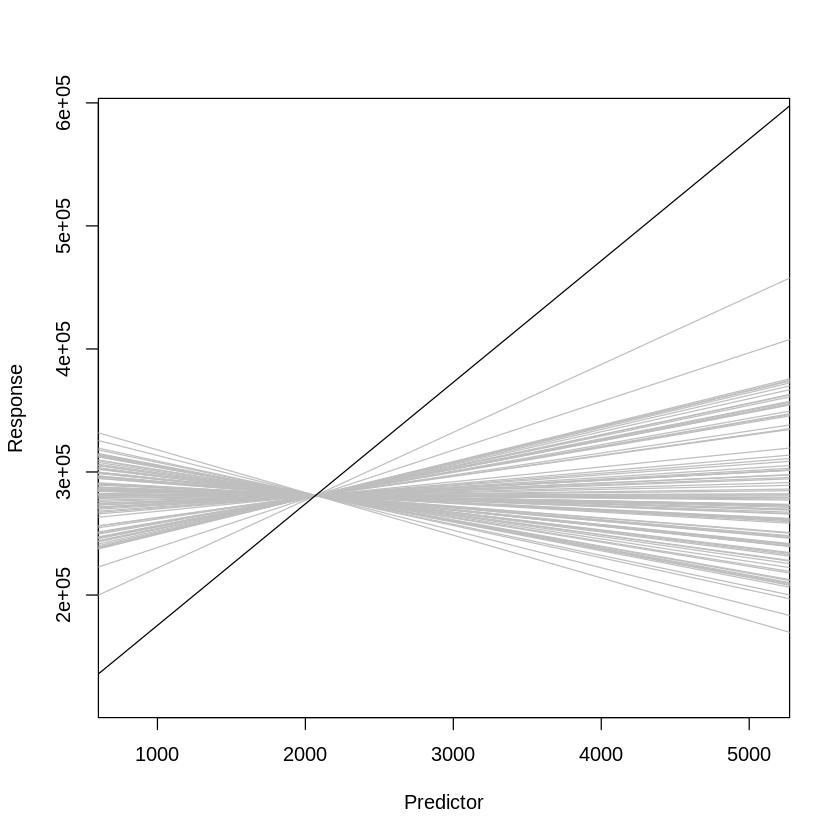

In [20]:
PermReg(LModel_Price_Sqft, b=100)

<table width='100%'><tr><td bgcolor="orange"><font color="white" size="+2">&nbsp;</font></td></tr></table>

#### The 95% CI for $\beta_{1}$

First, let's obtain the appropirate quantiles from a t-distribution with $df=(67-2)$.  A t-distribution with $df=65$ will have 95% of it's probability between $\pm 1.9971$.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1kAZVnWNZhIxkFaq4O3oc_jfW0_zRYVCj" width="50%" height="50%"></img></p>

The appropriate quantiles can be obtained direclty in R using the qt() function.

In [11]:
#Getting the 2.5% and 97.5% percentiles from t-distribution 
qt(c(0.025,0.975), df=65)

[1] -1.997138  1.997138

The 95% confidence interval for \beta_{1} is given by the following quantities.

$$
\begin{array}{rl}
Lower \space Endpoint: & & \hat{\beta}_{1} - \left( 1.9971 * Std \space Error(\hat{\beta}_{1})  \right) \\
& = &  98.81 - \left( 1.9971 * 8.98 \right) \\
& = &  80.87 \\
\end{array}
$$

Likewise for the upper endpoint, 

$$
\begin{array}{rl}
Upper \space Endpoint: & & \hat{\beta}_{1} + \left( 1.9971 * Std \space Error(\hat{\beta}_{1} \right) \\
& = &  98.81 + \left( 1.9971 * 8.98 \right) \\
& = &   116.74 \\
\end{array}
$$

### Inference for $\beta_{0}$

Akin to the test for the slope, the test done by most computing packages for the y-intercept is given by the following hypotheses. 

$$
\begin{array}{rl}
H_{0}: & \beta_{0} = 0 \\
H_{A}: & \beta_{0} \ne 0 \\
\end{array}
$$

The test statistic for this test is given by the following

$$
\begin{array}{rcl}
t & = & \frac{\hat{\beta}_{0} - \beta_{0}}{Std \space Error(\hat{\beta}_{0})} \\ 
& = & \frac{76500-0}{20260} \\
& = & 3.776
\end{array}
$$

The p-value for this test is defined as $P(T < -3.776) + P(T > 3.776)$ which is computed by the following quantity where $\nu = (67-2)$.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1cV5Dh1bcdG6XJGX1NYxqfiLh12ocU6-a" width="50%" height="50%"></img></p>

The $p-value$ can be computed directly in R using the pt() function.

In [ ]:
#p-value computation in R // for two-sided test
2*(1 - pt(abs(3.776), df=65))

[1] 0.000347756

The 95% confidence interval for $\beta_{0}$ is computed as follows.

The 95% confidence interval for \beta_{1} is given by the following quantities.

$$
\begin{array}{rl}
Lower \space Endpoint: & & \hat{\beta}_{0} - \left( 1.9971 * Std \space Error(\hat{\beta}_{0})  \right) \\
& = &  76500 - \left( 1.9971 * 20260 \right) \\
& = &  36038 \\
\end{array}
$$

Likewise for the upper endpoint, 

$$
\begin{array}{rl}
Upper \space Endpoint: & & \hat{\beta}_{0} + \left( 1.9971 * Std \space Error(\hat{\beta}_{0})  \right) \\
& = &  76500 + \left( 1.9971 * 20260 \right) \\
& = &  116962 \\
\end{array}
$$


## 95% Confidence Intervals for Regression Parameters via confit()

The 95% confidence intervals for linear model parameters can be computed using the confint() function.

In [21]:
confint(LModel_Price_Sqft)

,2.5 %,97.5 %
(Intercept),36037.81715,116961.5395
SQUAREFEET,80.87241,116.7439




---



---



## Joint Confidence Regions

Recall, the estimated parameters in vector form.

$$ \left[
\begin{array}{cc}
\hat{\beta}_{0} \\
\hat{\beta}_{1} \\
\end{array}
\right]
$$

The mean of this vector is 
$$ E( \left[
\begin{array}{cc}
\hat{\beta}_{0} \\
\hat{\beta}_{1} \\
\end{array}
\right] ) = \left[
\begin{array}{cc}
{\beta}_{0} \\
{\beta}_{1} \\
\end{array}
\right]
$$

The variance/covariance of this vector is 
$$ VAR( \left[
\begin{array}{cc}
\hat{\beta}_{0} \\
\hat{\beta}_{1} \\
\end{array}
\right] ) = \sigma^{2} \left( \frac{1}{n\sum{x_{i}^{2}} - (\sum{x_{i}})^2}\right) \left[
\begin{array}{cc}
\sum{x_{i}^{2}}& - \sum{x_i}  \\
- \sum{x_i} & n \\
\end{array}
\right]
$$


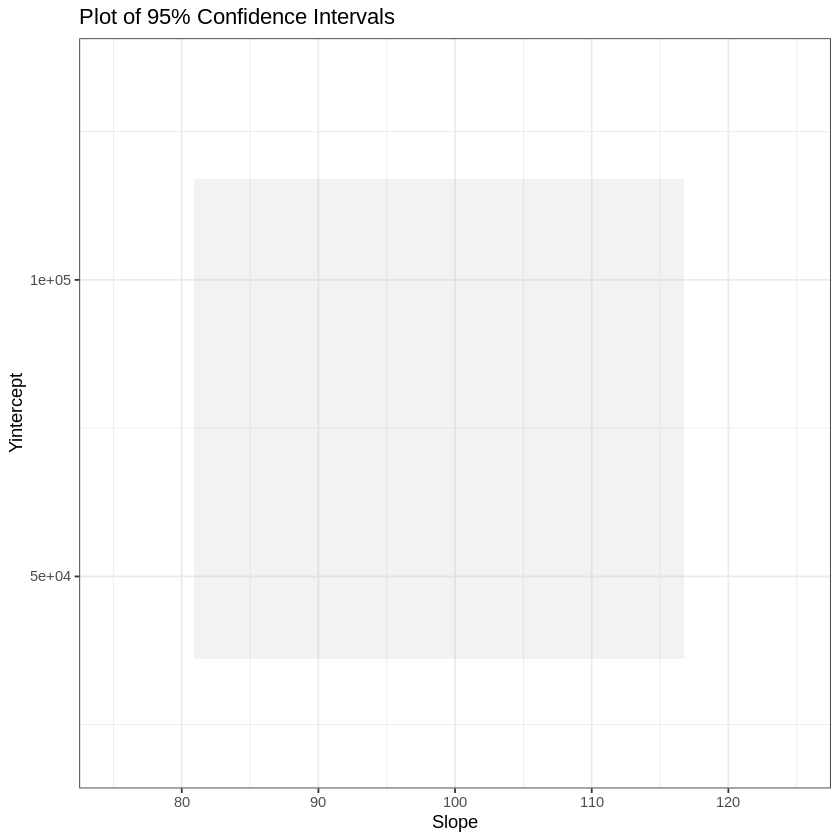

In [59]:
#Getting a 
Marginal_CIs <- data.frame(Slope=c(80.87, 80.87, 116.74, 116.74),Yintercept=c(36038, 116962, 116962, 36038))

#Graphing the ellipsoid 
ggplot(Marginal_CIs, aes(x=Slope,y=Yintercept)) +
  geom_polygon(
                alpha=1/5,
                fill="gray"
              ) + 
  xlim(75,125) +
  ylim(20000,135000) + 
  ggtitle("Plot of 95% Confidence Intervals") + 
  theme_bw()


In [33]:
#download the ellipse package
install.packages("ellipse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [34]:
#install the ellipse package in this COLAB session
library(ellipse)


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs




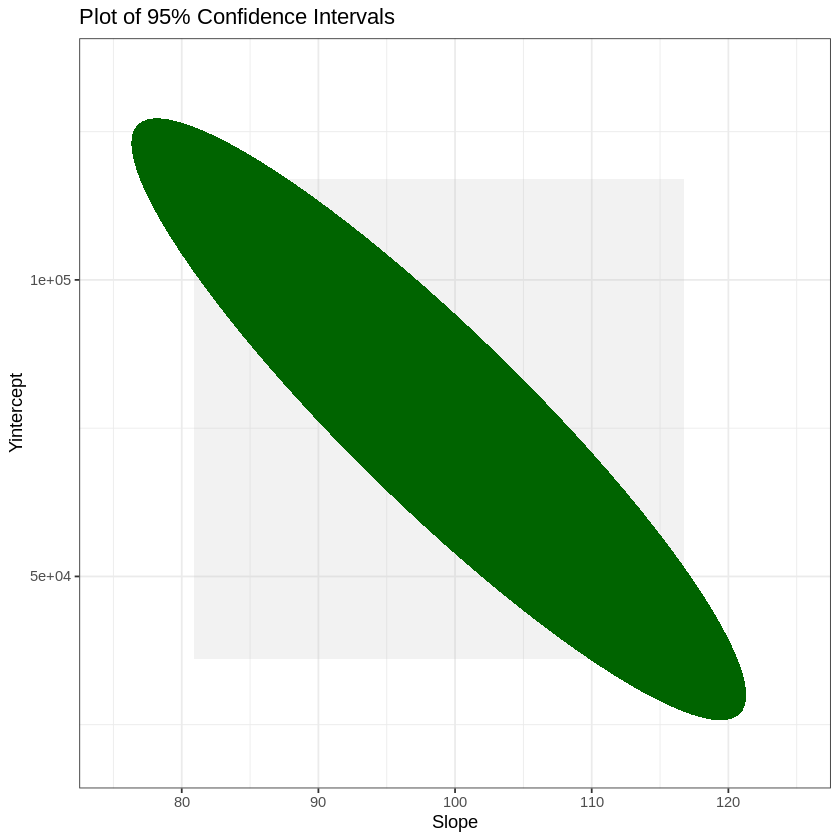

In [58]:
#Getting a maringal CIS
Marginal_CIs <- data.frame(Slope=c(80.87, 80.87, 116.74, 116.74),Yintercept=c(36038, 116962, 116962, 36038))

#Getting the 95% Joint CI
Joint_CIs <-as.data.frame(ellipse(LModel_Price_Sqft))

#Graphing the ellipsoid 
ggplot(Marginal_CIs, mapping=aes(x=Slope,y=Yintercept)) +
  geom_polygon( 
                alpha=1/5,
                fill="gray"
              ) + 
  #Adding 95% Joint CI
  geom_polygon(Joint_CIs, 
                mapping=aes(x=SQUAREFEET, y=`(Intercept)`), 
                fill="darkgreen"
              ) + 
  xlim(75,125) +
  ylim(20000,135000) + 
  ggtitle("Plot of 95% Confidence Intervals") + 
  theme_bw()



---



---
End of Document

